In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Statistical Inference
## Inferential statistics
- Population
    + All the elements from a set of studying data.
    + Parameters: mean, variance

- Sample
    + A subset of the population
    + Statistic = A measurable characteristic of a sample

- Inferential statistics = make inferences about the general population from a sample
    + Gaining insights about the population based on the collected samples
    + There are two main areas of inferential statistics
        + Estimation: 
            + Taking a statistic of a sample
            + Using that to say something about a population parameter
        + Hypothesis testing
            + Answering some research questions about a population using a sample of that population

## Point estimates
- Point estimates = Estimates of population parameters based on sample data
    + Example: Measure the average salary of all data scientists in the US
        + Take the salary data of 100 random data scientists 
        + The average of this sample = known as sample mean

- The sample mean is usually not the same as the population mean

In [2]:
df = pd.read_csv('./data/UCI_Credit_Card.csv')

# Population mean
pop_mean = df['AGE'].mean()
print('population mean : ',pop_mean)

# Sample mean
sample = df['AGE'].sample(
    n=200,
    random_state=7)
sample_mean = sample.mean()
print('Sample mean : ',sample_mean)

population mean :  35.4855
Sample mean :  35.055


## Sampling distributions
- The sample tends to follow the distribution of the population

Population Skew :  0.7322458687830562
Sample Skew :  0.7465528747076924


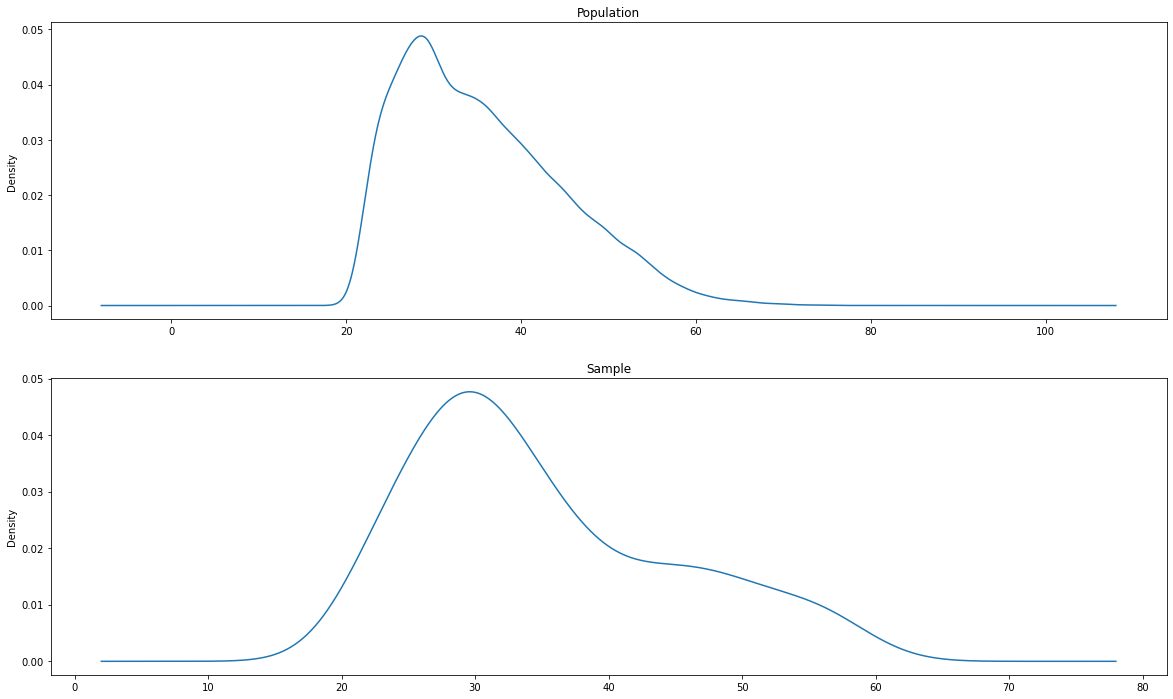

In [3]:
fig, subplots = plt.subplots(
    nrows=2,
    ncols=1,
    figsize = (20,12))

# plot population
df['AGE'].plot(
    kind = 'density',
    ax = subplots[0],
    title = 'Population')
pop_skew = df['AGE'].skew()
print('Population Skew : ', pop_skew)

# plot sample
sample = df['AGE'].sample(
    n = 200,
    random_state = 7)
sample.plot(
    kind = 'density',
    ax = subplots[1],
    title = 'Sample')
sample_skew = sample.skew()
print('Sample Skew : ', sample_skew)

plt.show()

## Central limit theorem
- A sample may not be normal distribution However
- Central limit theorem: The distribution of sample means(sampling distribution) will be normally distributed
    + The techniques we used on a normal distribution can be used on the sampling distribution
    + We can treat the sample mean as if it was drawn from a normal distribution
- Properties: The mean of the sample means is close to the actual population mean  
    $\to$ we can estimate population parameters using samples

mean of sample means : 35.46961999999999
mean of population : 35.4855
skew of sample means :  0.12066608766438121


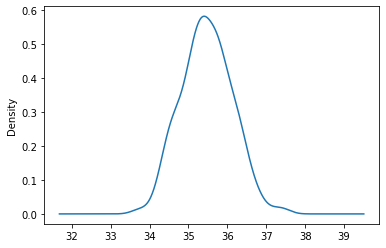

In [4]:
# Sample 500 time
sample_means = []
for i in range(500):
    sample = df['AGE'].sample(n=200)
    s_mean = sample.mean()
    sample_means.append(s_mean)

# plot the distribution of the sample means
sample_means_series = pd.Series(sample_means)
sample_means_series.plot(kind='density')

# compare the population mean and the mean of sample means
mean_of_sample_means = sample_means_series.mean()
pop_mean = df['AGE'].mean()
print('mean of sample means :', mean_of_sample_means)
print('mean of population :', pop_mean)
print('skew of sample means : ',sample_means_series.skew())